In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## whenever the data analysis can be performed make sure things to be correct

- check the missing value
- check the duplicate data
- check the datatype
- check the unique values present in the each column
- check the statistics of the dataset
- check the various categories present in the dat

# check the missing values
 


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights:
   There is no missing values present in this dataset

# check the duplicate data



In [6]:
df.duplicated().sum()

0

## insights :
    There is nothing duplicate items present in this student dataset

# check the datatype of the each column present in the dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## insights:
  *Only math_score, reading_score , writing_score containing the integer values 
    
  *Remaining the columns gender, race_ethnicity, parental_level_of_education, and all containing the datatype named object

# Check the statistics Present in this Dataset

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights:
  * The mean would be ranges to 66 to 69
  * The math_score only containing the value 0 others are having minimum value would be some number
  * All the standard deviation are same would be ranges to 14.6 15,15

# Check the number of unique values would be present in the each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# check the seperate the various categories present in the dataset

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


we will seperate the numerical data and categorical data

In [11]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype=='int64']


In [12]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [13]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
## we analyze the data by taking the total score of the mathsquare, reading square,writing score
## analyze the data by making their any effects in the data

In [16]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [17]:
df['average']=df['total_score']/3

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# explore this data within the more visualisation

In [22]:
import matplotlib.pyplot as plt


<Axes: xlabel='average', ylabel='Count'>

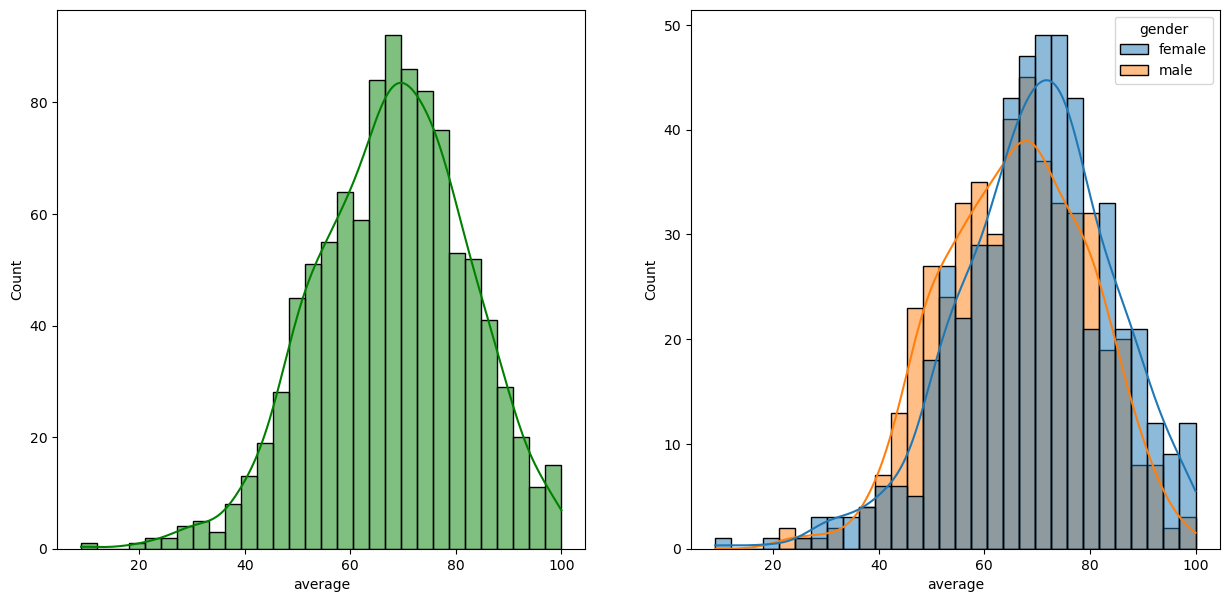

In [30]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,color='g',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

# Insights:
 
     - Females are performing well in the exam compared to males in the second plot 

<Axes: xlabel='average', ylabel='Count'>

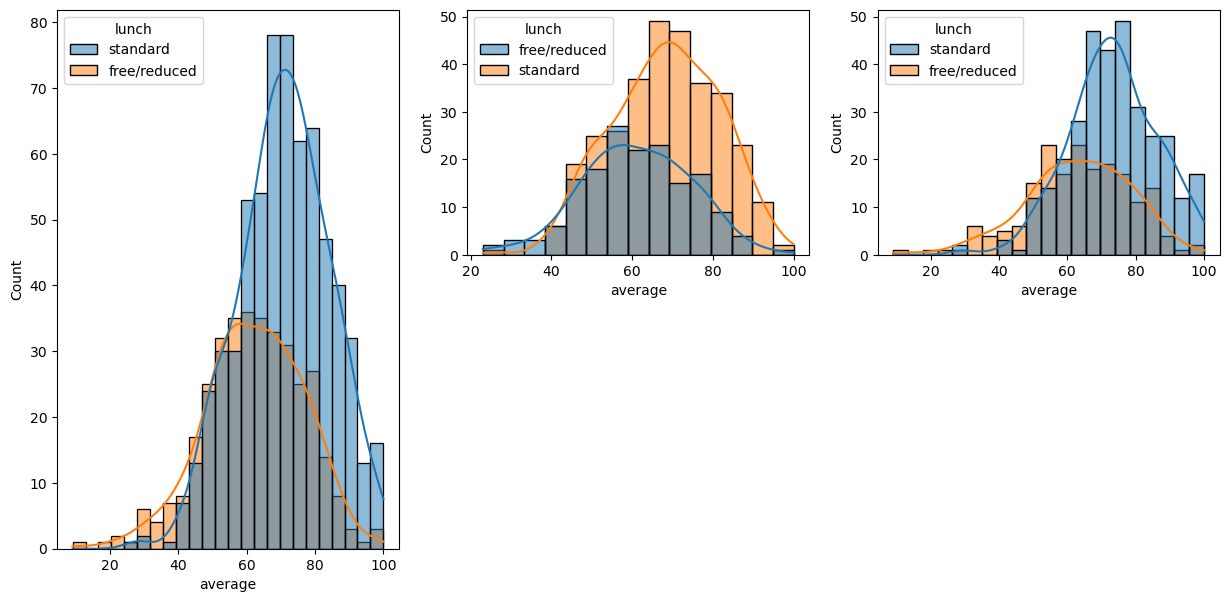

In [40]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(232)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(233)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

## Insights :
 - Standard lunch helps students perform well in exam
 - Standard luch  helps students perform well in exam both male and female


<Axes: xlabel='average', ylabel='Count'>

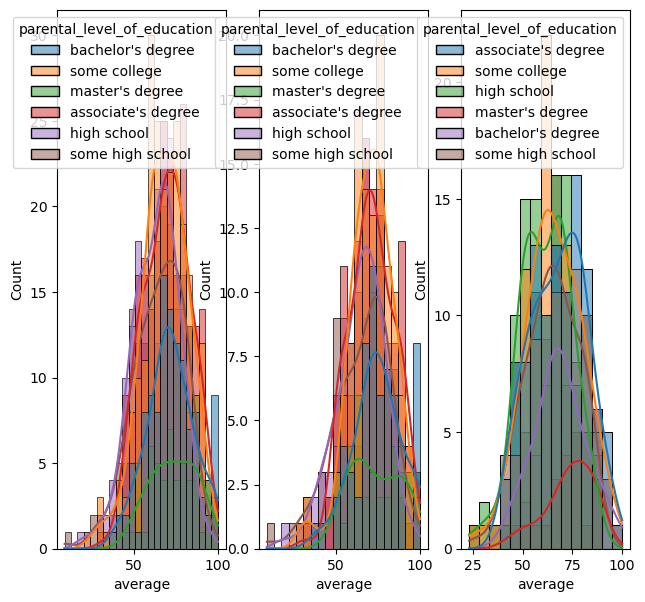

In [51]:
plt.subplots(1,3,figsize=(10,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

# Insights:
    - masters degree and some college level of parents their male children are performing well in exam
    - There is no parental level of education is effect in the female students to perform well in the exam

<Axes: xlabel='average', ylabel='Count'>

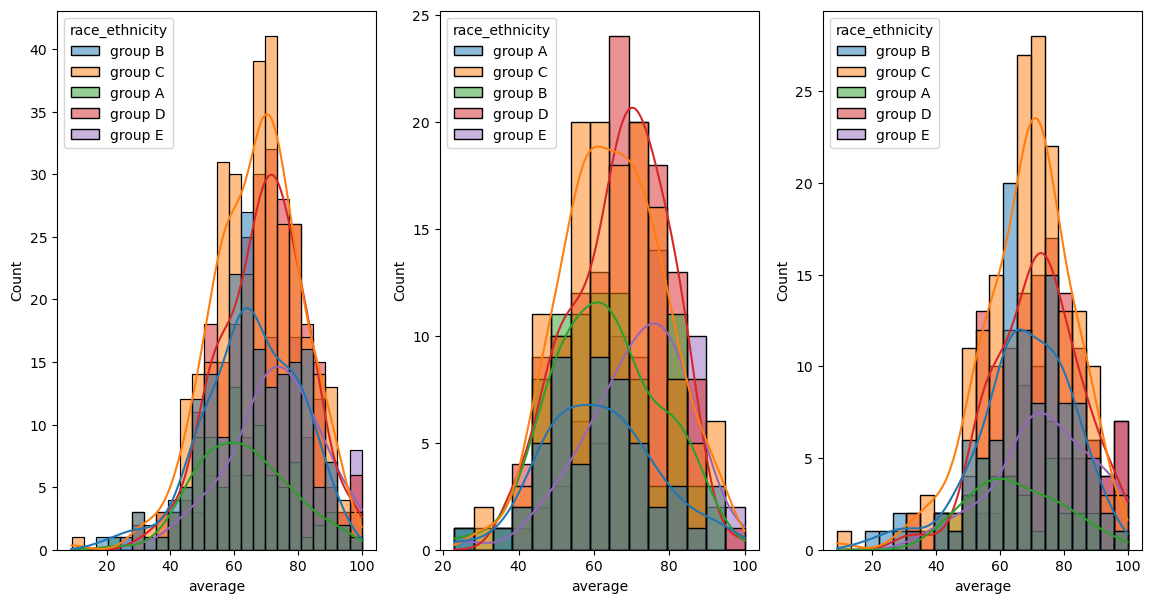

In [61]:
plt.subplots(1,3,figsize=(14,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')#group E has more scored.group A and B has less scored.
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')#group
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

# Insights:
 - Group A and B are tends to perform poorly in the exam
 - Group A and B are tends to perform poorly in the exam both male and female
 - Group E students are perform well in the exam in female section 

In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

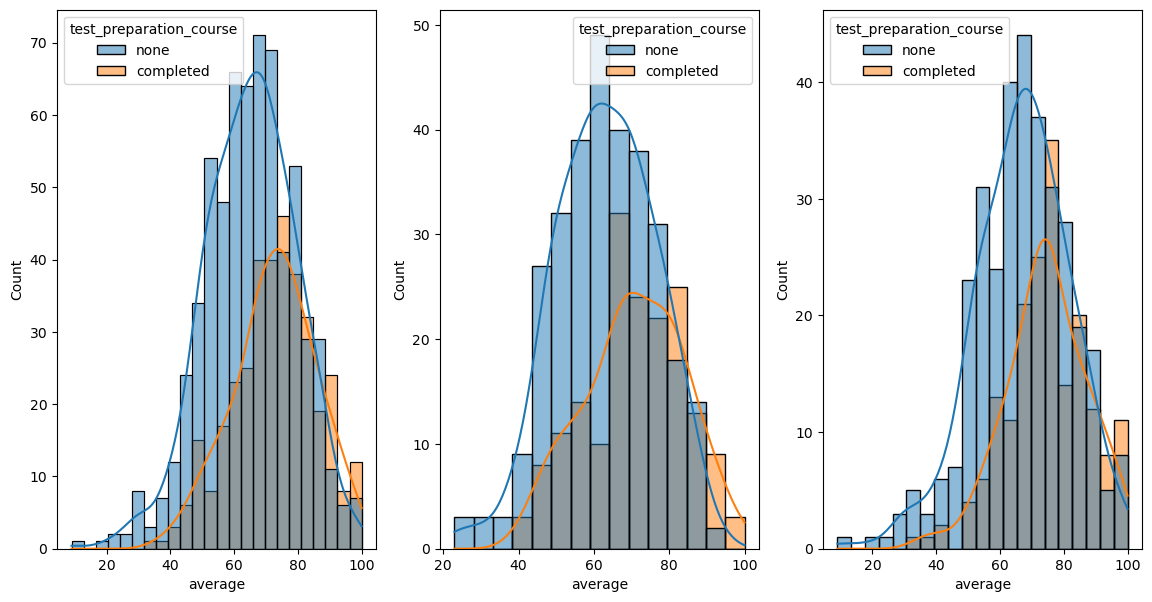

In [77]:
plt.subplots(1,3,figsize=(14,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test_preparation_course')

# Insights.::
  
    Those who have completed the score they can only score more compared those who not completed with respect both male and female students